# Figures

Prepared for "Labor and the recovery" presentation for the UW Now series on June 29, 2021. 

The file 'cycle dates pasted.csv' is from [data.nber.org/data/cycles/](http://data.nber.org/data/cycles/).  All other data are accessed from the FRED database.

Kim J. Ruhl 

In [15]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [2]:
# Define figure constants
fig_tick_size = 18
fig_line_wt = 2.5

In [3]:
# Business cycle dates
cycle = pd.read_csv('cycle dates pasted.csv')
cycle.peak = pd.to_datetime(cycle.peak)
cycle.trough = pd.to_datetime(cycle.trough)

## Employment population ratio

In [4]:
emp = web.DataReader(['EMRATIO', 'PAYEMS', 'LFWA64TTUSM647S'], 'fred', start = '1950-01-01')

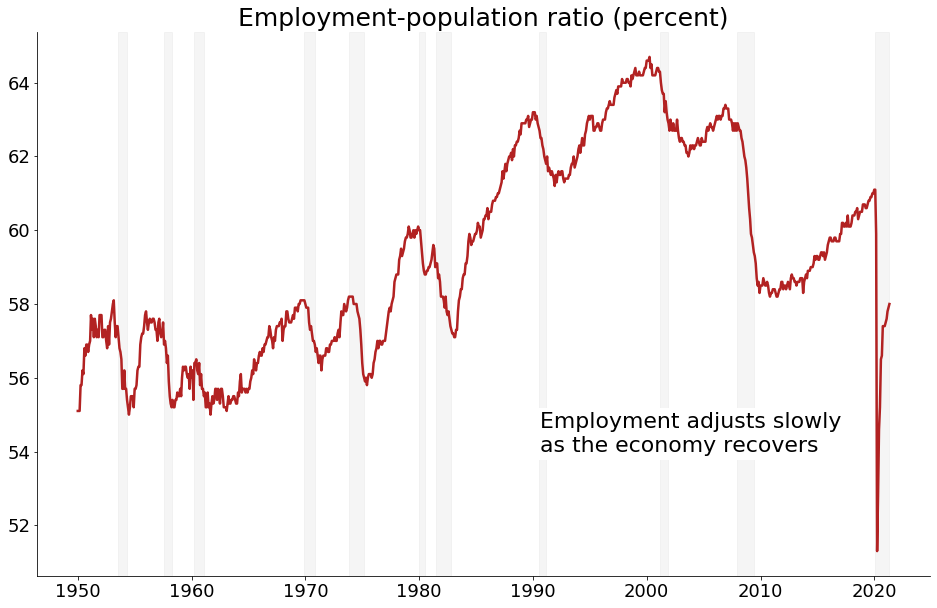

In [5]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Employment-population ratio (percent)', fontsize=25)

ax.plot(emp.index, emp.EMRATIO, color='firebrick', lw=fig_line_wt)
#ax.plot(emp.index, emp.emp_wap, color='black', lw=fig_line_wt)

for c in range(24,34):
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

plt.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

ax.text(dt.datetime(1990,8,1), 54, 'Employment adjusts slowly\nas the economy recovers', fontsize=22, ha='left',
       backgroundcolor='white')

sns.despine()

plt.savefig('figures/emp-pop.svg', bbox_inches='tight')

## Economy-wide hiring and separation rates

In [6]:
jolts = web.DataReader(['JTSHIR', 'JTSTSR'], 'fred', start = '2000-01-01')

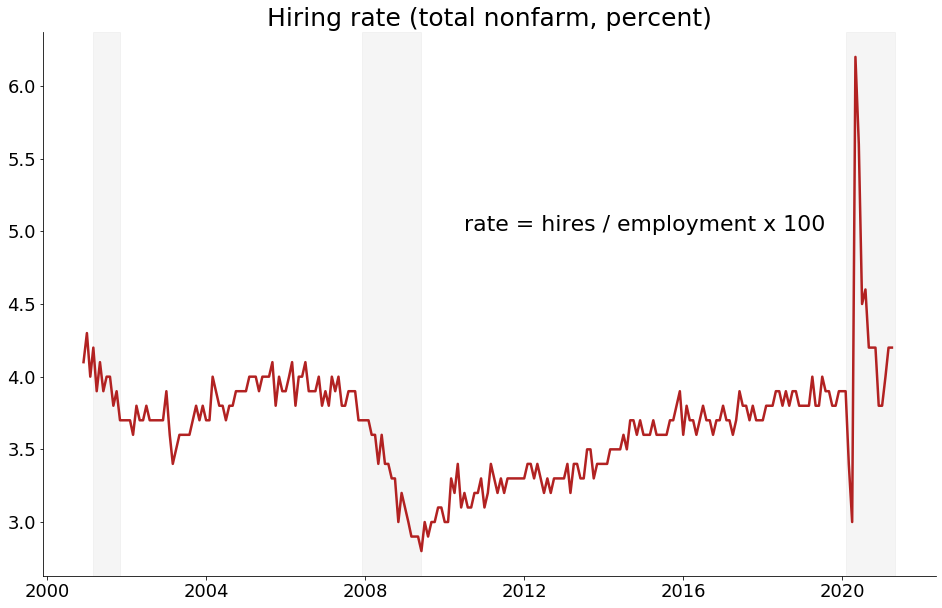

In [7]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Hiring rate (total nonfarm, percent)', fontsize=25)

ax.plot(jolts.index, jolts.JTSHIR, color='firebrick', lw=fig_line_wt)
#ax[1].plot(jolts.index, jolts.JTSTSR, color='black', lw=fig_line_wt)


ax.text(dt.datetime(2019,8,1), 5, 'rate = hires / employment x 100', fontsize=22, ha='right')



for c in range(32,34):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
ax.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

sns.despine()

plt.savefig('figures/hire.svg', bbox_inches='tight')

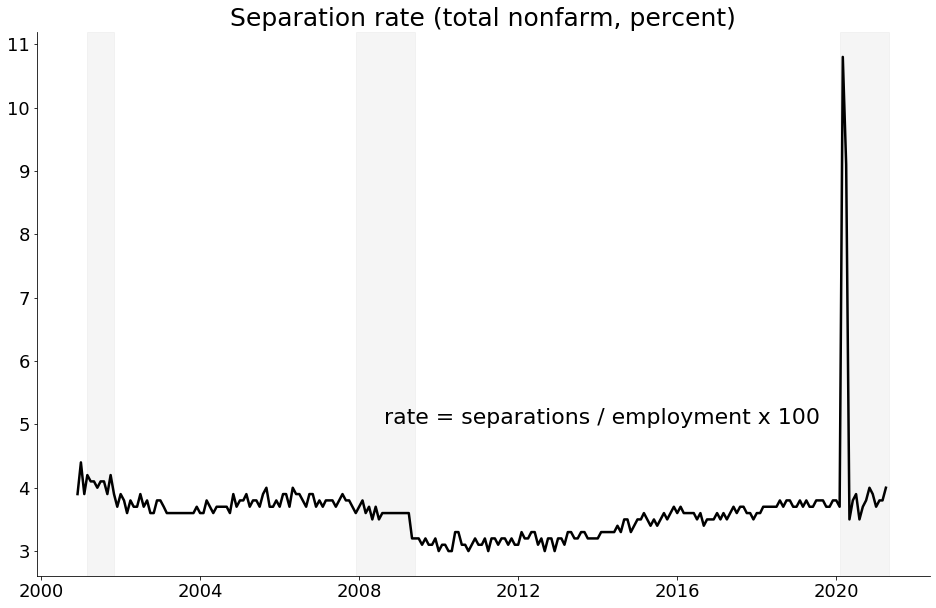

In [8]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Separation rate (total nonfarm, percent)', fontsize=25)

#ax.plot(jolts.index, jolts.JTSHIR, color='firebrick', lw=fig_line_wt)
ax.plot(jolts.index, jolts.JTSTSR, color='black', lw=fig_line_wt)


ax.text(dt.datetime(2019,8,1), 5, 'rate = separations / employment x 100', fontsize=22, ha='right')



for c in range(32,34):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)
ax.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15)

sns.despine()

plt.savefig('figures/sep.svg', bbox_inches='tight')

## Job openings rate

In [9]:
opens = web.DataReader(['JTS7000JOR', 'JTS7200JOR', 'JTS7100JOR', 'JTS3000JOR', 'JTS2300JOR', 'JTSJOR', 'JTSJOL',
                       'JTS540099JOR', 'JTS6200JOR', 'JTS4400JOR', 'JTS4000JOR', 'JTS6000JOR'], 'fred', start = '2019-01-01')
opens = opens.rename(columns={'JTS7000JOR': 'leis_hosp', 'JTS7200JOR':'accom_food', 'JTS7100JOR':'arts_rec',
                             'JTS3000JOR':'man', 'JTS2300JOR':'con', 'JTSJOR':'total', 'JTSJOL':'total_levels',
                             'JTS540099JOR':'prof_bus', 'JTS6200JOR':'health_soc', 'JTS4400JOR':'retail', 'JTS4000JOR':'trans',
                             'JTS6000JOR':'educ'})
opens.head(2)

,leis_hosp,accom_food,arts_rec,man,con,total,total_levels,prof_bus,health_soc,retail,trans,educ
DATE,,,,,,,,,,,,
2019-01-01,6.4,6.8,4.2,3.3,3.9,4.7,7478,6.1,5.7,4.9,4.9,5.3
2019-02-01,5.7,5.9,4.3,3.5,3.7,4.5,7058,6.1,5.2,4.8,4.4,4.8


In [10]:
# The 2019 average and the latest value
pre_mean = opens.loc['2019', 'total_levels'].mean()*1000
latest = opens.tail(1)['total_levels'].values[0]*1000

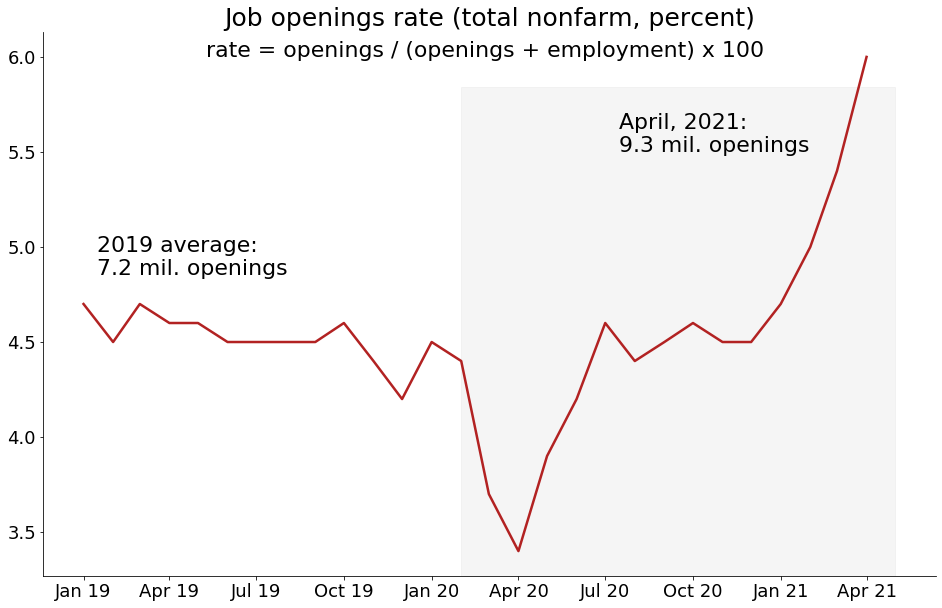

In [11]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Job openings rate (total nonfarm, percent)', fontsize=25)


ax.plot(opens.index, opens.total, color='firebrick', lw=fig_line_wt)

ax.text(dt.datetime(2020,12,15), 6, 'rate = openings / (openings + employment) x 100', fontsize=22, ha='right')
ax.text(dt.datetime(2019,1,15), 4.85, '2019 average:\n{:,.1f} mil. openings'.format(pre_mean/1000000), fontsize=22, ha='left')
ax.text(dt.datetime(2020,7,15), 5.5, 'April, 2021:\n{:,.1f} mil. openings'.format(latest/1000000), fontsize=22, ha='left')

ax.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15, ymax=0.9)

sns.despine()

plt.savefig('figures/open-total.svg', bbox_inches='tight')

In [12]:
# Keep the April 2020 and 2021 data. 
t = opens.loc[(opens.index=='2020-04-01') | (opens.index=='2021-04-01')]
t = t.drop('total_levels', axis=1)
t = t.stack()
t = t.reset_index()
t.columns = ['date', 'ind', 'value']
t = t.sort_values('value', ascending=False)
t.loc[t.ind=='arts_rec','label'] = 'Arts, enter., and recreation'
t.loc[t.ind=='leis_hosp','label'] = 'Leisure and hospitality'
t.loc[t.ind=='accom_food','label'] = 'Accom. and food service'
t.loc[t.ind=='prof_bus','label'] = 'Prof. and bus. services'
t.loc[t.ind=='man','label'] = 'Manufacturing'
t.loc[t.ind=='health_soc','label'] = 'Health care and social assist.'
t.loc[t.ind=='retail','label'] = 'Retail'
t.loc[t.ind=='trans','label'] = 'Wholesale, transport, util.'
t.loc[t.ind=='educ','label'] = 'Education'
t.loc[t.ind=='con','label'] = 'Construction'
t = t[t.ind!='total']
t.head(2)

,date,ind,value,label
13,2021-04-01,arts_rec,11.6,"Arts, enter., and recreation"
11,2021-04-01,leis_hosp,10.1,Leisure and hospitality


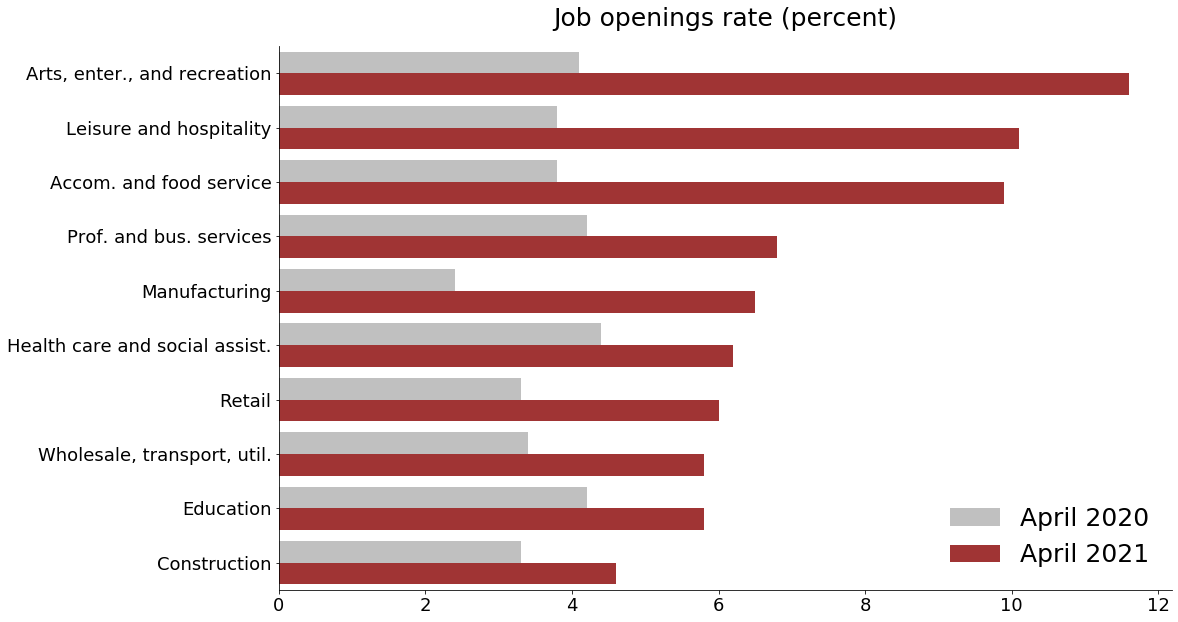

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Job openings rate (percent)', fontsize=25, pad=20)

bs = sns.barplot(y=t.label, x=t.value, hue=t.date, ci=None, ax=ax, palette=['silver', 'firebrick'])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine()

ax.legend(labels=['April 2020', 'April 2021'], fontsize=25, frameon=False)

#plt.show()

plt.savefig('figures/open-bar.svg', bbox_inches='tight')

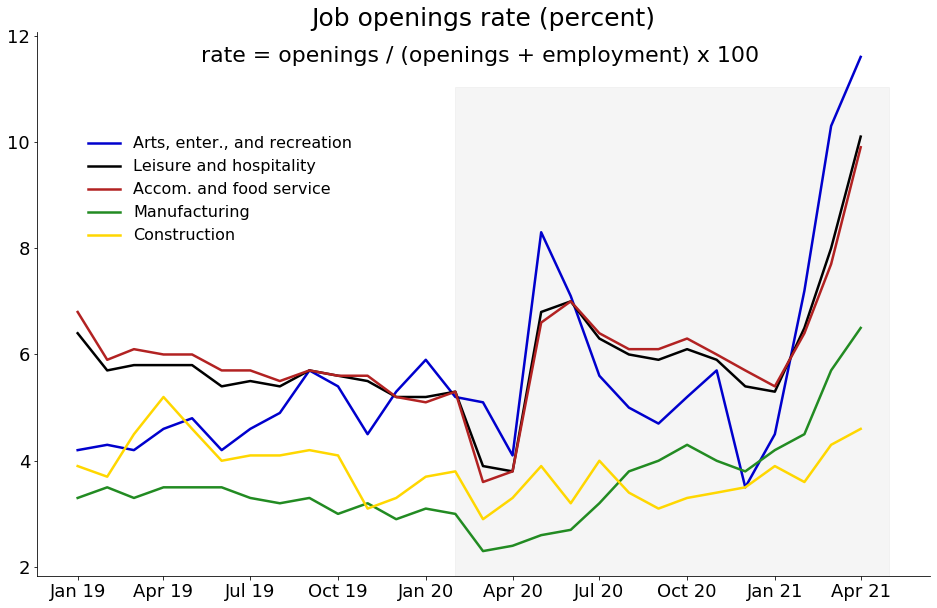

In [14]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Job openings rate (percent)', fontsize=25)

ax.plot(opens.index, opens.arts_rec, color='mediumblue', lw=fig_line_wt, label='Arts, enter., and recreation')
ax.plot(opens.index, opens.leis_hosp, color='black', lw=fig_line_wt, label='Leisure and hospitality')
ax.plot(opens.index, opens.accom_food, color='firebrick', lw=fig_line_wt, label='Accom. and food service')

ax.plot(opens.index, opens.man, color='forestgreen', lw=fig_line_wt, label='Manufacturing')
ax.plot(opens.index, opens.con, color='gold', lw=fig_line_wt, label='Construction')


ax.text(dt.datetime(2020,12,15), 11.5, 'rate = openings / (openings + employment) x 100', fontsize=22, ha='right')
ax.legend(frameon=False, fontsize=16, loc=(0.05, 0.6))

ax.axvspan(cycle.loc[34,'peak'],dt.datetime(2021,5,1), color='silver', alpha=0.15, ymax=0.9)

sns.despine()

plt.savefig('figures/open-ind.svg', bbox_inches='tight')